# Spotify 2023

Vamos a hacer un analizis de las mas movidas y de los generos

#### Importamos los datos

datos de https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

Description :
This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

Key Features:
track_name: Name of the song
artist(s)_name: Name of the artist(s) of the song
artist_count: Number of artists contributing to the song
released_year: Year when the song was released
released_month: Month when the song was released
released_day: Day of the month when the song was released
in_spotify_playlists: Number of Spotify playlists the song is included in
in_spotify_charts: Presence and rank of the song on Spotify charts
streams: Total number of streams on Spotify
in_apple_playlists: Number of Apple Music playlists the song is included in
in_apple_charts: Presence and rank of the song on Apple Music charts
in_deezer_playlists: Number of Deezer playlists the song is included in
in_deezer_charts: Presence and rank of the song on Deezer charts
in_shazam_charts: Presence and rank of the song on Shazam charts
bpm: Beats per minute, a measure of song tempo
key: Key of the song
mode: Mode of the song (major or minor)
danceability_%: Percentage indicating how suitable the song is for dancing
valence_%: Positivity of the song's musical content
energy_%: Perceived energy level of the song
acousticness_%: Amount of acoustic sound in the song
instrumentalness_%: Amount of instrumental content in the song
liveness_%: Presence of live performance elements
speechiness_%: Amount of spoken words in the song


In [1]:
import numpy as np

def patch_asscalar(a):
    return a.item()

setattr(np, "asscalar", patch_asscalar)
import numpy as np
import kmapper as km
import sklearn
from sklearn import ensemble

In [2]:
import pandas as pd
df = pd.read_csv("Spotify 2023.csv", encoding='ISO-8859-1') # encoding='ISO-8859-1' is used to avoid pandas encoding error

### Conocemos nuestra db

In [ ]:
df.head(5)

In [ ]:
df.describe()

MAXIMO 8 ARTISTAS?!

In [ ]:
df.nlargest(5, 'artist_count')

#### Elegimos las columnas con las caracerísticas relevantes.

Conocemos nuestras columnas.

In [ ]:
df.columns

In [3]:
from sklearn.preprocessing import MinMaxScaler

df['bpm'] = MinMaxScaler(feature_range=(10, 90)).fit_transform(df[['bpm']])
df['released_year'] = MinMaxScaler(feature_range=(20, 80)).fit_transform(df[['released_year']])
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

In [ ]:
print(df['mode'].unique())

Cuando usan el modo menor tienden a ser tristes y con el modo mayor alegres

In [4]:
df = df.replace({'Major': 51, 'Minor': 49})

C:\Users\herie\AppData\Local\Temp\ipykernel_17592\1806413930.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Major': 51, 'Minor': 49})


Vemos el tipo de los datos

In [ ]:
df.dtypes

# Visualizar datos

Visualizamos los datos

In [ ]:
import seaborn as sns
import os
import matplotlib.pyplot as plt

if not os.path.exists('Pairplot'):
    os.makedirs('Pairplot')

generos = ["bpm", "danceability_%", "valence_%", "energy_%", "liveness_%",
           "acousticness_%", "instrumentalness_%", "speechiness_%", "mode", "released_year"]

n=500
pairplot = sns.pairplot(df.sample(n)[generos], hue = 'bpm', palette= 'viridis')
plt.savefig(f'Pairplot/pairplot{n}.png')

In [ ]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as py
import os

def create_3d_scatter(x_col, y_col, z_col):
    fig = go.Figure(data=[go.Scatter3d(
        x=df[x_col],
        y=df[y_col],
        z=df[z_col],
        mode='markers',
        marker=dict(
            size=3,
            color=df[z_col],
            colorscale='Viridis',   
            opacity=0.5
        ),
        text=df['track_name'],  
        hoverinfo='text'  
    )])

    title = f'{x_col}, {y_col}, {z_col}'
    fig.update_layout(
        title=title,
        scene = dict(
            xaxis = dict(title = x_col, showbackground=False),
            yaxis = dict(title = y_col,showbackground=False),
            zaxis = dict(title = z_col,showbackground=False),
        ),
        margin=dict(l=0, r=0, b=0, t=0)
    )
    
    current_dir = os.getcwd()
    subfolder = '3D Scatter plot'
    filename = os.path.join(current_dir, subfolder, title.replace(' ', '_') + '.html')
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    py.write_html(fig, filename)

    fig.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as py
import os

def create_3d_scatter_sphere(x_col, y_col, z_col, sphere_center=None, sphere_radius=None):
    fig = go.Figure(data=[go.Scatter3d(
        x=df[x_col],
        y=df[y_col],
        z=df[z_col],
        mode='markers',
        marker=dict(
            size=3,
            color=df[z_col],
            colorscale='Viridis',   
            opacity=0.5
        ),
        text=df['track_name'], 
        hoverinfo='text'  
    )])

    if sphere_center is not None and sphere_radius is not None:
        sphere = go.Mesh3d(
            x=[sphere_center[0] + sphere_radius * np.sin(theta) * np.cos(phi) for theta in np.linspace(0, 2*np.pi, 100) for phi in np.linspace(0, np.pi, 100)],
            y=[sphere_center[1] + sphere_radius * np.sin(theta) * np.sin(phi) for theta in np.linspace(0, 2*np.pi, 100) for phi in np.linspace(0, np.pi, 100)],
            z=[sphere_center[2] + sphere_radius * np.cos(theta) for theta in np.linspace(0, 2*np.pi, 100) for phi in np.linspace(0, np.pi, 100)],
            opacity=0.01,
            color='red'
        )
        fig.add_trace(sphere)

    title = f'{x_col}, {y_col}, {z_col}'
    fig.update_layout(
        title=title,
        scene = dict(
            xaxis = dict(title = x_col, showbackground=False),
            yaxis = dict(title = y_col,showbackground=False),
            zaxis = dict(title = z_col,showbackground=False),
        ),
        margin=dict(l=0, r=0, b=0, t=0)
    )
    
    current_dir = os.getcwd()
    subfolder = '3D Scatter plot ball'
    filename = os.path.join(current_dir, subfolder, title.replace(' ', '_') + '.html')
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    py.write_html(fig, filename)

    fig.show()

Los puntos mas negativos son, personas de edad corta, que deben mucho, tienen poco salario base mensual :c y viceversa

# Más movidas 

Para conocer las canciones más movidas y las más lentas

In [ ]:
create_3d_scatter('energy_%', 'bpm', 'danceability_%')

In [ ]:
create_3d_scatter_sphere('energy_%', 'bpm', 'danceability_%', sphere_center=[75, 75, 75], sphere_radius=10)

In [ ]:
masmovidas = ['energy_%', 'bpm', 'danceability_%']
MasMovidas = np.array(df[masmovidas])
TrackName = np.array(df['track_name'])

In [ ]:
mapper = km.KeplerMapper(verbose=3)

#### DBSCAN

In [ ]:
import os

eps = 20
min_samples = 1
n_cubes = 20
perc_overlap = .35

lens = mapper.fit_transform(MasMovidas, projection="l2norm")


graph = mapper.map(
    lens,
    MasMovidas,
    clusterer=sklearn.cluster.DBSCAN(eps=eps, min_samples=min_samples),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Más Movidas/DBSCAN'
filename = os.path.join(current_dir, subfolder, f"l2norm_eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap{perc_overlap}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=TrackName,
                 title=f"Más movidas eps{eps},min_samples{min_samples},n_cubes{n_cubes},perc_overlap{perc_overlap}")

# Más Parecidas

Para los genereos usamos más variables

In [5]:
generos = ["bpm", "danceability_%", "valence_%", "energy_%", "liveness_%",
           "acousticness_%", "instrumentalness_%", "speechiness_%", "mode", "released_year"]

Generos = np.array(df[generos])
TrackName = np.array(df['track_name'])

In [ ]:
print(df[generos].dtypes)

In [ ]:
mapper = km.KeplerMapper(verbose=3)

#### K Means

Hacemos la prueba del codo para conocer cuantos clusters vamos a usar

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = df[generos]

wss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

plt.figure(facecolor=(33/255, 33/255, 33/255))
plt.gca().set_facecolor((33/255, 33/255, 33/255))
plt.plot(range(1, 16), wss, color='white')
plt.title('Elbow Method', color='white')
plt.xlabel('Number of clusters', color='white')
plt.ylabel('WSS', color='white')
plt.tick_params(colors='white')
plt.show()

In [ ]:
import os

lens = mapper.fit_transform(Generos, projection="l2norm")

n_clusters = 8
n_cubes = 50
perc_overlap = .7

graph = mapper.map(
    lens,
    Generos,
    clusterer=sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=11),
    cover=km.Cover(n_cubes=n_cubes, perc_overlap=perc_overlap),
)

current_dir = os.getcwd()
subfolder = 'Más Parecidas/K Means'
filename = os.path.join(current_dir, subfolder, f"l2_clusters{n_clusters},n_cubes{n_cubes},perc_overlap{perc_overlap}.html")
os.makedirs(os.path.dirname(filename), exist_ok=True)
mapper.visualize(graph,
                 path_html=filename,
                 custom_tooltips=TrackName,
                 title=f"n_clusters{n_clusters},n_cubes{n_cubes},perc_overlap{perc_overlap}")

# Homología

In [6]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False

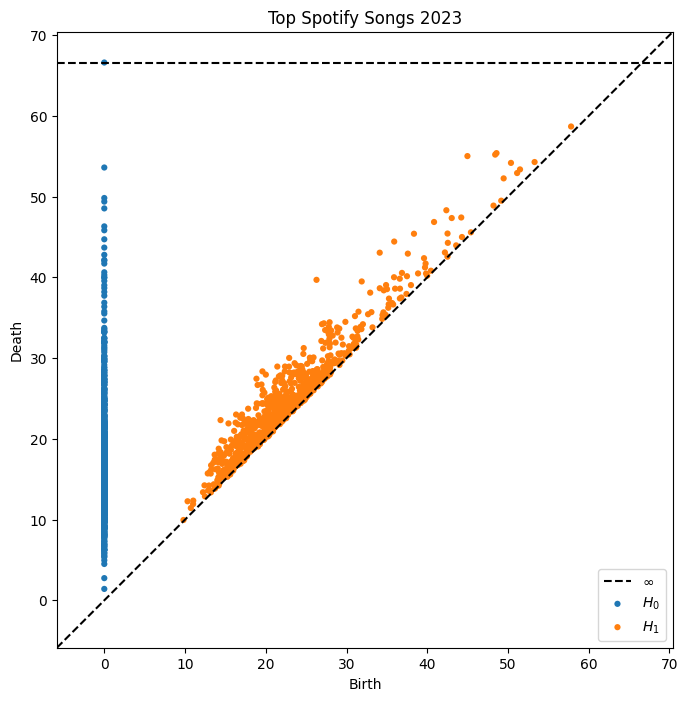

In [7]:
diagram_gandp = ripser(df[generos], maxdim=1)['dgms']
plt.figure(figsize=(8, 8)) 
plot_diagrams(diagram_gandp, show=True, title="Top Spotify Songs 2023")

In [8]:
import matplotlib.pyplot as plt

def barcode_homology_persistence(data, title):
    result = ripser(data, maxdim=1)
    diagrams = result['dgms']
    plt.figure(figsize=(15, 15))
    plt.suptitle(title)
    for i, dgm in enumerate(diagrams):
        plt.subplot(1, 2, i+1)
        for j, pt in enumerate(dgm):
            plt.plot([pt[0], pt[1]], [j, j], '-o')  
        plt.title(f"Dimension {i}")
    plt.tight_layout()
    plt.show()

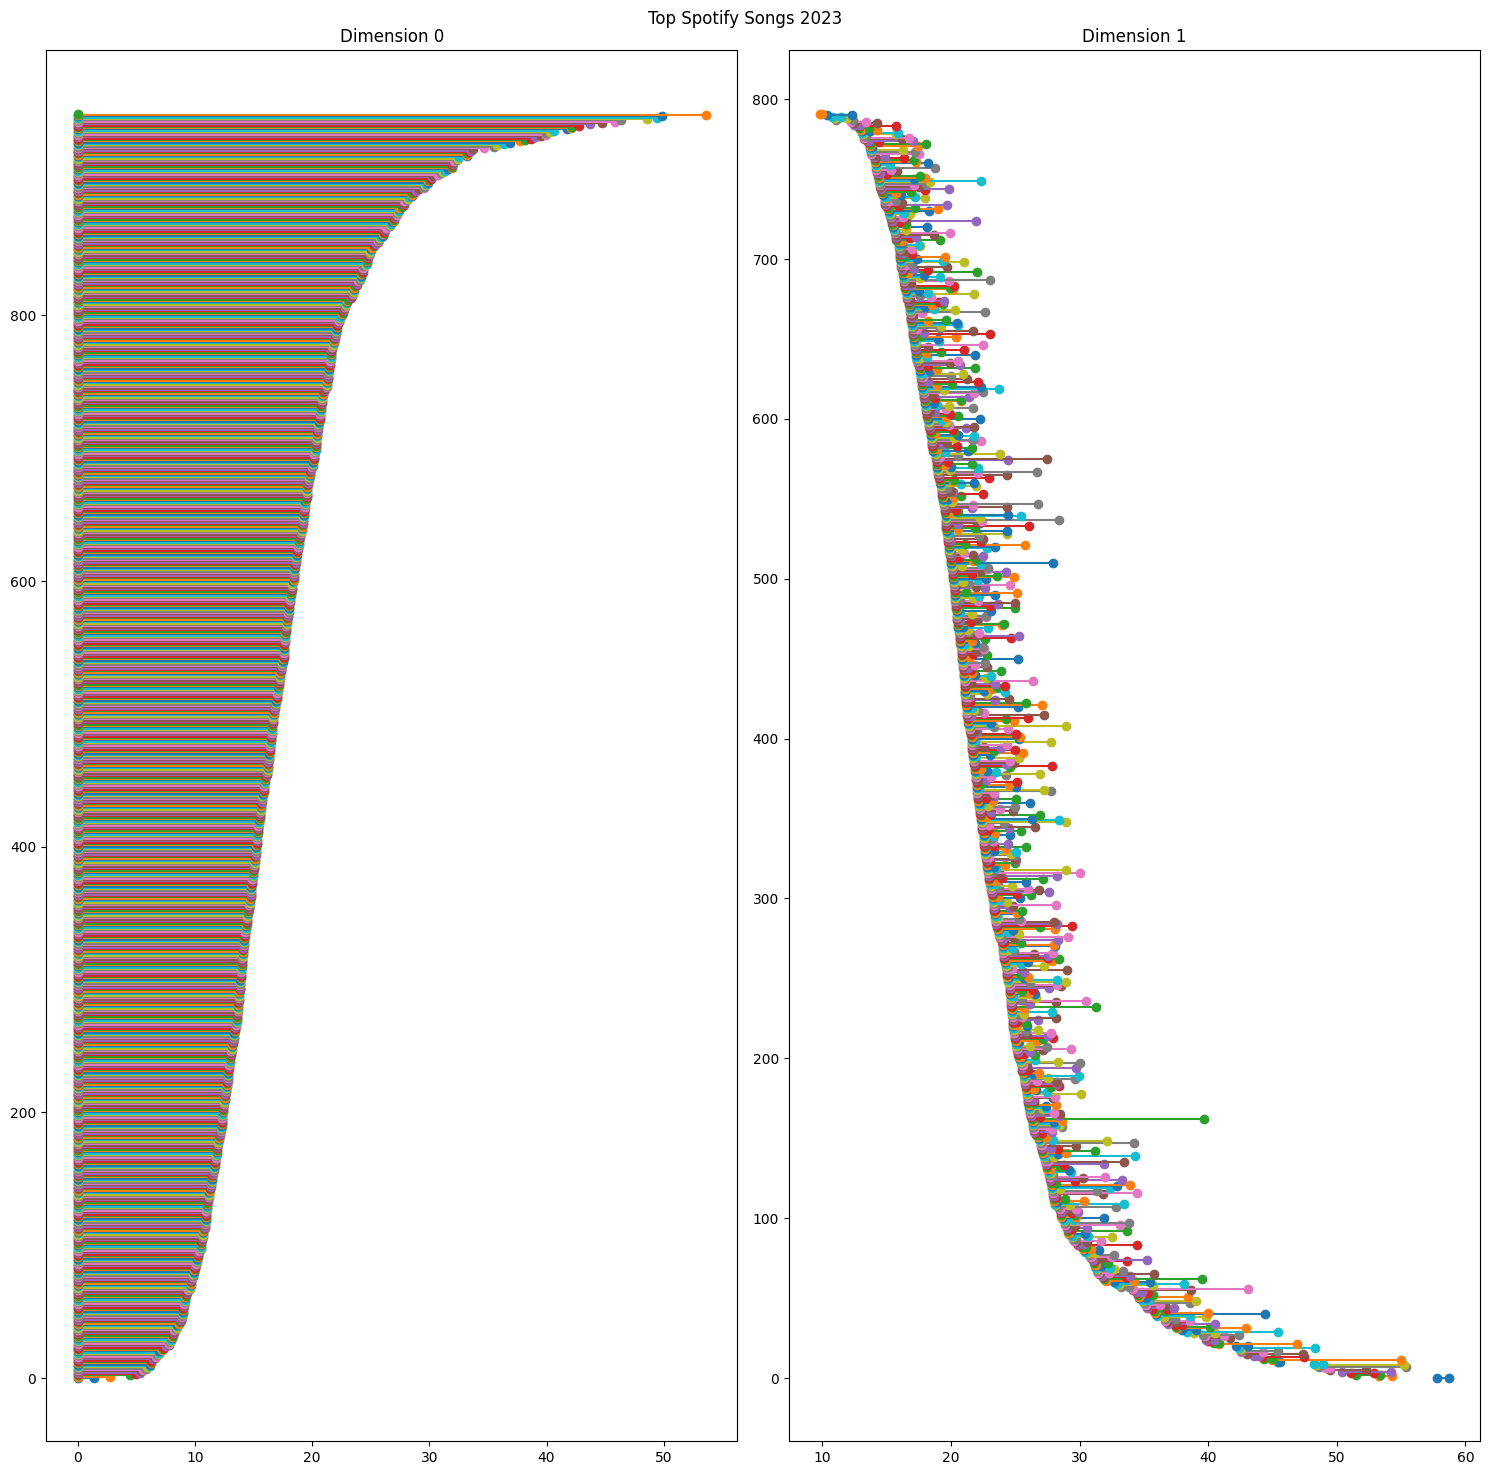

In [9]:
barcode_homology_persistence(df[generos], "Top Spotify Songs 2023")